### Import Libraries:

In [13]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
import sklearn

In [14]:
plt.style.use('seaborn')

In [15]:
data = pd.read_csv("sap_stock.txt")

In [16]:
df = pd.DataFrame(data, columns=['Close'])
df = df.reset_index()

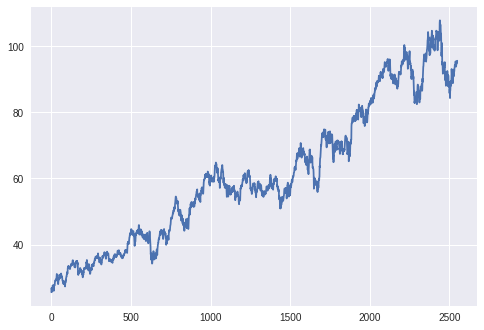

In [17]:
plt.plot(df["index"], df["Close"])
plt.show()

### Prepare the Dataset:

In [18]:
train, test = train_test_split(df, test_size=0.20)
train.shape, test.shape

((2040, 2), (510, 2))

In [19]:
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [20]:
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

### Create Model:

In [21]:
# create model:
model = SVR(kernel="rbf", degree=5)

# model train:
model.fit(X_train, y_train)

SVR(degree=5)

### Model Evaluation

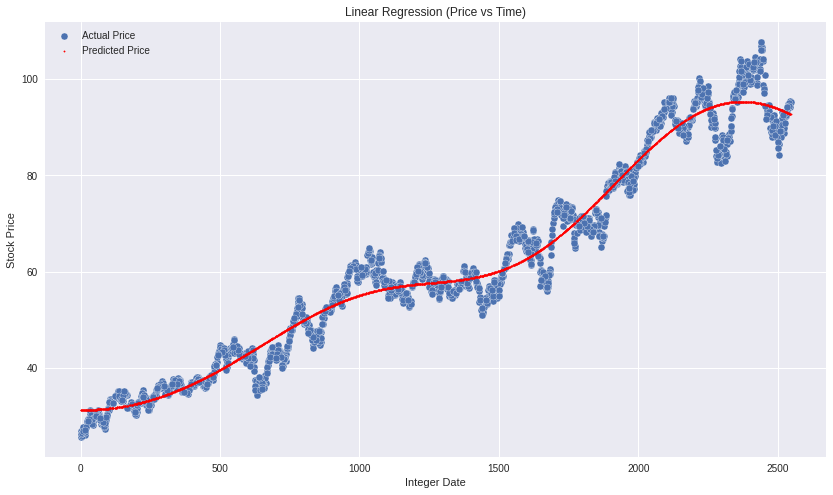

In [22]:
plt.figure(1, figsize=[14, 8])

plt.title('Linear Regression (Price vs Time)')

# plot points:
plt.scatter(X_train[:, 0], y_train, edgecolor='w', label='Actual Price')

# plot regression line:
plt.scatter(X_train[:, 0], model.predict(X_train), color='r', s=2, label='Predicted Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price')

plt.legend()
plt.show()

### Prediction from our Model

In [23]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [24]:
y_pred = model.predict(X_test)

### Model Evaluation:

In [25]:
sklearn.metrics.r2_score(y_test, y_pred)

0.9670236912762912

In [26]:
scores = {
    "r2": sklearn.metrics.r2_score(y_test, y_pred),
    "mae": sklearn.metrics.mean_absolute_error(y_test, y_pred),
    "mse": sklearn.metrics.mean_squared_error(y_test, y_pred),
    "explained_variance": sklearn.metrics.explained_variance_score(y_test, y_pred)
}

scores

{'r2': 0.9670236912762912,
 'mae': 2.9154430631602786,
 'mse': 14.488743756633532,
 'explained_variance': 0.9671571888549264}